In [1]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 5.2 MB/s 


In [2]:
import xlsxwriter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import time
from statistics import mean

# Import Data

In [3]:
# import data train dari traintest.xlsx
df = pd.read_excel("https://github.com/daffaferdiansyah/TuPro3-AI/blob/main/traintest.xlsx?raw=true", sheet_name='train')
df

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0
...,...,...,...,...,...
291,292,59,64,1,1
292,293,65,67,0,1
293,294,53,65,12,0
294,295,57,64,1,0


#Data Preprocessing



Text(0.5, 1.0, 'Data train sebelum normalisasi')

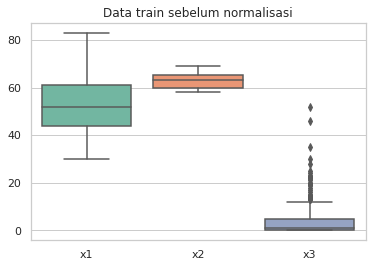

In [4]:
# menampilkan data train yang belum dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data train sebelum normalisasi')

In [5]:
# Normalisasi data train menggunakan rumus min-max scaling
dfNorm = pd.DataFrame(index=df.index, columns=df.columns)
xMax = df["x1"].max()
xMin = df["x1"].min()
for i in range(len(df)):
    x = df["x1"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfNorm["x1"][i] = xNew

xMax = df["x2"].max()
xMin = df["x2"].min()
for i in range(len(df)):
    x = df["x2"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfNorm["x2"][i] = xNew

xMax = df["x3"].max()
xMin = df["x3"].min()
for i in range(len(df)):
    x = df["x3"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfNorm["x3"][i] = xNew

dfNorm['x1'] = dfNorm['x1'].astype(float)
dfNorm['x2'] = dfNorm['x2'].astype(float)
dfNorm['x3'] = dfNorm['x3'].astype(float)
dfNorm['y'] = df['y']
dfNorm['id'] = df['id']
dfNorm

,id,x1,x2,x3,y
0,1,0.566038,0.545455,0.000000,1
1,2,0.452830,0.181818,0.211538,0
2,3,0.660377,0.363636,0.423077,0
3,4,0.075472,0.181818,0.000000,1
4,5,0.150943,1.000000,0.403846,0
...,...,...,...,...,...
291,292,0.547170,0.545455,0.019231,1
292,293,0.660377,0.818182,0.000000,1
293,294,0.433962,0.636364,0.230769,0
294,295,0.509434,0.545455,0.019231,0


Text(0.5, 1.0, 'Data train setelah normalisasi')

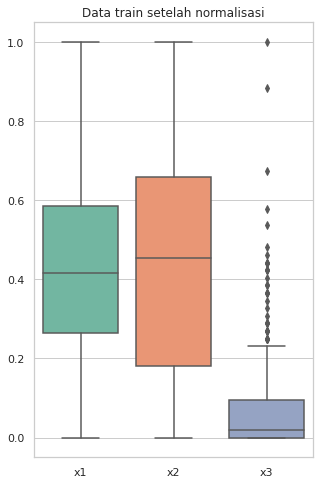

In [6]:
# menampilkan data train yang sudah dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=dfNorm[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data train setelah normalisasi')

#KNN

In [7]:
start_time_KNN = time.time()
# Metode Eucledian
def Euclidean(dfNorm, test):
    result = []
    for i in range(len(dfNorm)):
        distancex = math.sqrt((((dfNorm['x1'][i] - test['x1']) ** 2) +
                               ((dfNorm['x2'][i] - test['x2']) ** 2) + 
                               ((dfNorm['x3'][i] - test['x3']) ** 2)))
        result.append([distancex, dfNorm['y'][i]])
    return result

# Metode Manhattan
def Manhattan(dfNorm, test):
    result = []
    for i in range(len(dfNorm)):
        distance = (abs(dfNorm['x1'][i] - test['x1']) + 
                    abs(dfNorm['x2'][i] - test['x2']) + 
                    abs(dfNorm['x3'][i] - test['x3']))
        result.append([distance , dfNorm['y'][i]])
    return result

In [8]:
# Memanggil fungsi Eucledian, melakukan sort, mengambil k data teratas, dan melakukan label vote
def KNNeuclidean(dfNorm, dfTestNorm, k):
    hasil = []
    for i in range(len(dfTestNorm)):
        distance = Euclidean(dfNorm, dfTestNorm.iloc[[i]])
        distance = sorted(distance, key=lambda x:x[0])
        distanceK = distance[:k]
        satu = 0
        nol = 0 
        for j in range(k):
            if distanceK[j][1] == 1:
                satu += 1
            else:
                nol += 1
        if satu > nol:
            hasil.append([dfTestNorm.loc[i, 'id'], 1])
        else:
            hasil.append([dfTestNorm.loc[i, 'id'], 0])
    dfHasil = pd.DataFrame(hasil, columns = ['id', 'y'])
    return dfHasil

# Memanggil fungsi Manhattan, melakukan sort, mengambil k data teratas, dan melakukan label vote
def KNNmanhattan(dfNorm, dfTestNorm, k):
    hasil = []
    for i in range(len(dfTestNorm)):
        distance = Manhattan(dfNorm, dfTestNorm.iloc[i])
        distance = sorted(distance, key=lambda x:x[0])
        distanceK = distance[:k]
        satu = 0
        nol = 0 
        for j in range(k):
            if distanceK[j][1] == 1:
                satu += 1
            else:
                nol += 1
        if satu > nol:
            hasil.append([dfTestNorm.loc[i, 'id'], 1])
        else:
            hasil.append([dfTestNorm.loc[i, 'id'], 0])
    dfHasil = pd.DataFrame(hasil, columns = ['id', 'y'])
    return dfHasil

def getKNN(dfNorm, dfTestNorm, k):
    return {
        'euclidean' : KNNeuclidean(dfNorm, dfTestNorm, k),
        'manhattan' : KNNmanhattan(dfNorm, dfTestNorm, k)
    }

Melakukan validasi dengan menggunakan rumus eucledian

In [66]:
def Validation(dfNorm, k):
    testfold1 = dfNorm.iloc[:59].drop('y', axis = 1)
    trainfold1 = dfNorm.iloc[59:].reset_index().drop('index', axis = 1)
    testfold2 = dfNorm.iloc[59:118].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold2 = pd.concat([dfNorm.iloc[:59], dfNorm.iloc[118:]]).reset_index().drop('index', axis = 1)
    testfold3 = dfNorm.iloc[118:177].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold3 = pd.concat([dfNorm.iloc[:118], dfNorm.iloc[177:]]).reset_index().drop('index', axis = 1)
    testfold4 = dfNorm.iloc[177:236].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold4 = pd.concat([dfNorm.iloc[:177], dfNorm.iloc[236:]]).reset_index().drop('index', axis = 1)
    testfold5 = dfNorm.iloc[236:295].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold5 = dfNorm.iloc[0:236].reset_index().drop('index', axis = 1)
    hasilfold1 = getKNN(trainfold1, testfold1, k)
    hasilfold2 = getKNN(trainfold2, testfold2, k)
    hasilfold3 = getKNN(trainfold3, testfold3, k)
    hasilfold4 = getKNN(trainfold4, testfold4, k)
    hasilfold5 = getKNN(trainfold5, testfold5, k)
   
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 1
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold1['euclidean']['y'][i] == 1 and dfNorm['y'][i] == 1:
            TP += 1
        elif hasilfold1['euclidean']['y'][i] == 0 and dfNorm['y'][i] == 0:
            TN += 1
        elif hasilfold1['euclidean']['y'][i] == 0 and dfNorm['y'][i] == 1:
            FN += 1
        elif hasilfold1['euclidean']['y'][i] == 1 and dfNorm['y'][i] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('=============Fold 1=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 2
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold2['euclidean']['y'][i] == 1 and dfNorm.iloc[59:118]['y'][i+59] == 1:
            TP += 1
        elif hasilfold2['euclidean']['y'][i] == 0 and dfNorm.iloc[59:118]['y'][i+59] == 0:
            TN += 1
        elif hasilfold2['euclidean']['y'][i] == 0 and dfNorm.iloc[59:118]['y'][i+59] == 1:
            FN += 1
        elif hasilfold2['euclidean']['y'][i] == 1 and dfNorm.iloc[59:118]['y'][i+59] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 2=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)
    
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 3
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold3['euclidean']['y'][i] == 1 and dfNorm.iloc[118:177]['y'][i+118] == 1:
            TP += 1
        elif hasilfold3['euclidean']['y'][i] == 0 and dfNorm.iloc[118:177]['y'][i+118] == 0:
            TN += 1
        elif hasilfold3['euclidean']['y'][i] == 0 and dfNorm.iloc[118:177]['y'][i+118] == 1:
            FN += 1
        elif hasilfold3['euclidean']['y'][i] == 1 and dfNorm.iloc[118:177]['y'][i+118] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 3=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 4
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold4['euclidean']['y'][i] == 1 and dfNorm.iloc[177:236]['y'][i+177] == 1:
            TP += 1
        elif hasilfold4['euclidean']['y'][i] == 0 and dfNorm.iloc[177:236]['y'][i+177] == 0:
            TN += 1
        elif hasilfold4['euclidean']['y'][i] == 0 and dfNorm.iloc[177:236]['y'][i+177] == 1:
            FN += 1
        elif hasilfold4['euclidean']['y'][i] == 1 and dfNorm.iloc[177:236]['y'][i+177] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 4=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 5
    for i in range(len(hasilfold1['euclidean'])):
        if hasilfold5['euclidean']['y'][i] == 1 and dfNorm.iloc[236:295]['y'][i+236] == 1:
            TP += 1
        elif hasilfold5['euclidean']['y'][i] == 0 and dfNorm.iloc[236:295]['y'][i+236] == 0:
            TN += 1
        elif hasilfold5['euclidean']['y'][i] == 0 and dfNorm.iloc[236:295]['y'][i+236] == 1:
            FN += 1
        elif hasilfold5['euclidean']['y'][i] == 1 and dfNorm.iloc[236:295]['y'][i+236] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 5=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

# Hasil Validation #1
Validation(dfNorm, k=3)

=============Fold 1=============
Accuracy 	: 0.6610169491525424
Error rate 	: 0.3389830508474576
Recall 		: 0.8372093023255814
Precision 	: 0.7346938775510204
F1 Score 	: 0.782608695652174

=============Fold 2=============
Accuracy 	: 0.7966101694915254
Error rate 	: 0.2033898305084746
Recall 		: 0.8775510204081632
Precision 	: 0.8775510204081632
F1 Score 	: 0.8775510204081631

=============Fold 3=============
Accuracy 	: 0.7796610169491526
Error rate 	: 0.22033898305084743
Recall 		: 0.8913043478260869
Precision 	: 0.8367346938775511
F1 Score 	: 0.8631578947368421

=============Fold 4=============
Accuracy 	: 0.5423728813559322
Error rate 	: 0.4576271186440678
Recall 		: 0.7428571428571429
Precision 	: 0.5909090909090909
F1 Score 	: 0.6582278481012659

=============Fold 5=============
Accuracy 	: 0.711864406779661
Error rate 	: 0.288135593220339
Recall 		: 0.8409090909090909
Precision 	: 0.7872340425531915
F1 Score 	: 0.8131868131868133


In [67]:
# Hasil Validation #2
Validation(dfNorm, k=7)

=============Fold 1=============
Accuracy 	: 0.6779661016949152
Error rate 	: 0.3220338983050848
Recall 		: 0.8604651162790697
Precision 	: 0.74
F1 Score 	: 0.7956989247311828

=============Fold 2=============
Accuracy 	: 0.8135593220338984
Error rate 	: 0.18644067796610164
Recall 		: 0.9387755102040817
Precision 	: 0.8518518518518519
F1 Score 	: 0.8932038834951458

=============Fold 3=============
Accuracy 	: 0.7796610169491526
Error rate 	: 0.22033898305084743
Recall 		: 0.8913043478260869
Precision 	: 0.8367346938775511
F1 Score 	: 0.8631578947368421

=============Fold 4=============
Accuracy 	: 0.5423728813559322
Error rate 	: 0.4576271186440678
Recall 		: 0.8285714285714286
Precision 	: 0.58
F1 Score 	: 0.6823529411764706

=============Fold 5=============
Accuracy 	: 0.711864406779661
Error rate 	: 0.288135593220339
Recall 		: 0.9090909090909091
Precision 	: 0.7547169811320755
F1 Score 	: 0.8247422680412373


In [68]:
# Hasil Validation #3
Validation(dfNorm, k=11)

=============Fold 1=============
Accuracy 	: 0.6949152542372882
Error rate 	: 0.30508474576271183
Recall 		: 0.8837209302325582
Precision 	: 0.7450980392156863
F1 Score 	: 0.8085106382978724

=============Fold 2=============
Accuracy 	: 0.8305084745762712
Error rate 	: 0.1694915254237288
Recall 		: 0.9591836734693877
Precision 	: 0.8545454545454545
F1 Score 	: 0.9038461538461537

=============Fold 3=============
Accuracy 	: 0.8135593220338984
Error rate 	: 0.18644067796610164
Recall 		: 0.9347826086956522
Precision 	: 0.8431372549019608
F1 Score 	: 0.8865979381443299

=============Fold 4=============
Accuracy 	: 0.559322033898305
Error rate 	: 0.44067796610169496
Recall 		: 0.8571428571428571
Precision 	: 0.5882352941176471
F1 Score 	: 0.6976744186046512

=============Fold 5=============
Accuracy 	: 0.7457627118644068
Error rate 	: 0.2542372881355932
Recall 		: 0.9545454545454546
Precision 	: 0.7636363636363637
F1 Score 	: 0.8484848484848485


In [69]:
# Hasil Validation #4
Validation(dfNorm, k=15)

=============Fold 1=============
Accuracy 	: 0.6949152542372882
Error rate 	: 0.30508474576271183
Recall 		: 0.9069767441860465
Precision 	: 0.7358490566037735
F1 Score 	: 0.8124999999999999

=============Fold 2=============
Accuracy 	: 0.847457627118644
Error rate 	: 0.15254237288135597
Recall 		: 0.9591836734693877
Precision 	: 0.8703703703703703
F1 Score 	: 0.912621359223301

=============Fold 3=============
Accuracy 	: 0.847457627118644
Error rate 	: 0.15254237288135597
Recall 		: 0.9782608695652174
Precision 	: 0.8490566037735849
F1 Score 	: 0.9090909090909092

=============Fold 4=============
Accuracy 	: 0.6101694915254238
Error rate 	: 0.38983050847457623
Recall 		: 0.9428571428571428
Precision 	: 0.6111111111111112
F1 Score 	: 0.7415730337078652

=============Fold 5=============
Accuracy 	: 0.7457627118644068
Error rate 	: 0.2542372881355932
Recall 		: 0.9545454545454546
Precision 	: 0.7636363636363637
F1 Score 	: 0.8484848484848485


In [70]:
# Hasil Validation #5
Validation(dfNorm, k=17)

=============Fold 1=============
Accuracy 	: 0.711864406779661
Error rate 	: 0.288135593220339
Recall 		: 0.9302325581395349
Precision 	: 0.7407407407407407
F1 Score 	: 0.8247422680412371

=============Fold 2=============
Accuracy 	: 0.8305084745762712
Error rate 	: 0.1694915254237288
Recall 		: 0.9591836734693877
Precision 	: 0.8545454545454545
F1 Score 	: 0.9038461538461537

=============Fold 3=============
Accuracy 	: 0.8305084745762712
Error rate 	: 0.1694915254237288
Recall 		: 0.9782608695652174
Precision 	: 0.8333333333333334
F1 Score 	: 0.9

=============Fold 4=============
Accuracy 	: 0.5423728813559322
Error rate 	: 0.4576271186440678
Recall 		: 0.8571428571428571
Precision 	: 0.5769230769230769
F1 Score 	: 0.689655172413793

=============Fold 5=============
Accuracy 	: 0.7457627118644068
Error rate 	: 0.2542372881355932
Recall 		: 0.9545454545454546
Precision 	: 0.7636363636363637
F1 Score 	: 0.8484848484848485


#Testing
Testing menggunakan rumus eucledian dan manhattan

In [29]:
# import data test dari traintest.xlsx
dfTest = pd.read_excel("https://github.com/daffaferdiansyah/TuPro3-AI/blob/main/traintest.xlsx?raw=true", sheet_name='test').drop('y', axis=1)
dfTest

,id,x1,x2,x3
0,297,43,59,2
1,298,67,66,0
2,299,58,60,3
3,300,49,63,3
4,301,45,60,0
5,302,54,58,1
6,303,56,66,3
7,304,42,69,1
8,305,50,59,2
9,306,59,60,0


Text(0.5, 1.0, 'Data test sebelum normalisasi')

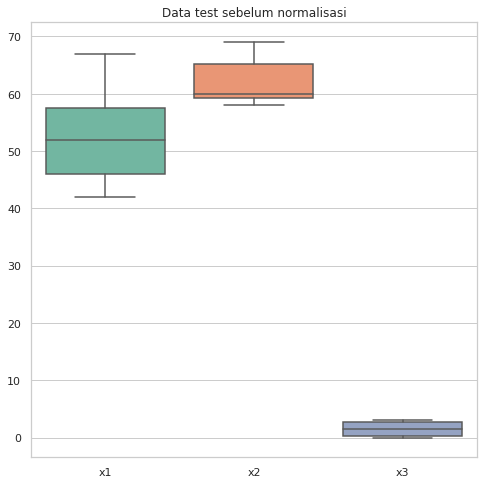

In [30]:
# menampilkan data test yang belum dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=dfTest[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(5, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data test sebelum normalisasi')

In [31]:
# Normalisasi data test menggunakan rumus min-max scaling
dfTestNorm = pd.DataFrame(index=dfTest.index, columns=dfTest.columns)
xMax = dfTest["x1"].max()
xMin = dfTest["x1"].min()
for i in range(len(dfTest)):
    x = dfTest["x1"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfTestNorm["x1"][i] = float(xNew)

xMax = dfTest["x2"].max()
xMin = dfTest["x2"].min()
for i in range(len(dfTest)):
    x = dfTest["x2"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfTestNorm["x2"][i] = float(xNew)

xMax = dfTest["x3"].max()
xMin = dfTest["x3"].min()
for i in range(len(dfTest)):
    x = dfTest["x3"][i]
    xNew = (x - xMin) / (xMax - xMin)
    dfTestNorm["x3"][i] = float(xNew)

dfTestNorm['x1'] = dfTestNorm['x1'].astype(float)
dfTestNorm['x2'] = dfTestNorm['x2'].astype(float)
dfTestNorm['x3'] = dfTestNorm['x3'].astype(float)
dfTestNorm['id'] = dfTest['id'].astype(str)
dfTestNorm

,id,x1,x2,x3
0,297,0.04,0.090909,0.666667
1,298,1.00,0.727273,0.000000
2,299,0.64,0.181818,1.000000
3,300,0.28,0.454545,1.000000
4,301,0.12,0.181818,0.000000
5,302,0.48,0.000000,0.333333
6,303,0.56,0.727273,1.000000
7,304,0.00,1.000000,0.333333
8,305,0.32,0.090909,0.666667
9,306,0.68,0.181818,0.000000


Text(0.5, 1.0, 'Data test setelah normalisasi')

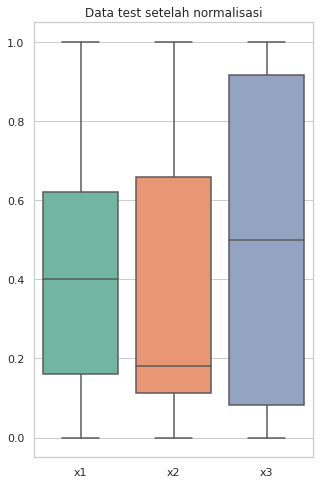

In [17]:
# menampilkan data test yang sudah dinormalisasi dalam bentuk boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=dfTestNorm[['x1', 'x2', 'x3']], orient="v", palette="Set2")
sns.set(rc={'figure.figsize':(8, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('Data test setelah normalisasi')

In [45]:
# pemanggilan fungsi getKNN untuk mendapatkan hasil KNN dari manhattan dan euclidean
KNN = getKNN(dfNorm, dfTestNorm, k=15)

# akhir run program KNN
KNN_time = time.time() - start_time_KNN

KNN['euclidean']

,id,y
0,297,0
1,298,1
2,299,0
3,300,0
4,301,1
5,302,0
6,303,0
7,304,1
8,305,0
9,306,1


In [46]:
KNN['manhattan']

,id,y
0,297,1
1,298,1
2,299,0
3,300,0
4,301,1
5,302,0
6,303,1
7,304,1
8,305,0
9,306,1


In [47]:
dfTesting = pd.read_excel("https://github.com/daffaferdiansyah/TuPro3-AI/blob/main/test.xlsx?raw=true")
dfTesting

,id,x1,x2,x3,y
0,297,43,59,2,0
1,298,67,66,0,1
2,299,58,60,3,1
3,300,49,63,3,1
4,301,45,60,0,1
5,302,54,58,1,1
6,303,56,66,3,0
7,304,42,69,1,0
8,305,50,59,2,1
9,306,59,60,0,1


In [62]:
TP = 0
TN = 0
FN = 0
FP = 0
for i in range(len(KNN['euclidean'])):
    if KNN['euclidean']['y'][i] == 1 and dfTesting['y'][i] == 1:
        TP += 1
    elif KNN['euclidean']['y'][i] == 0 and dfTesting['y'][i] == 0:
        TN += 1
    elif KNN['euclidean']['y'][i] == 0 and dfTesting['y'][i] == 1:
        FN += 1
    elif KNN['euclidean']['y'][i] == 1 and dfTesting['y'][i] == 0:
        FP += 1
accu = (TP + TN) / (TP + TN + FP + FN)
err = 1 - accu
rec = TP / (TP + FN)
prec = TP / (TP + FP)
F1 = 2 * (prec * rec) / (prec + rec)

print('=============Testing Euclidean=============')
print('Accuracy \t:', accu)
print('Error rate \t:', err)
print('Recall \t\t:', rec)
print('Precision \t:', prec)
print('F1 Score \t:', F1)

=============Testing Euclidean=============
Accuracy 	: 0.5
Error rate 	: 0.5
Recall 		: 0.42857142857142855
Precision 	: 0.75
F1 Score 	: 0.5454545454545454


In [63]:
TP = 0
TN = 0
FN = 0
FP = 0
for i in range(len(KNN['manhattan'])):
    if KNN['manhattan']['y'][i] == 1 and dfTesting['y'][i] == 1:
        TP += 1
    elif KNN['manhattan']['y'][i] == 0 and dfTesting['y'][i] == 0:
        TN += 1
    elif KNN['manhattan']['y'][i] == 0 and dfTesting['y'][i] == 1:
        FN += 1
    elif KNN['manhattan']['y'][i] == 1 and dfTesting['y'][i] == 0:
        FP += 1
accu = (TP + TN) / (TP + TN + FP + FN)
err = 1 - accu
rec = TP / (TP + FN)
prec = TP / (TP + FP)
F1 = 2 * (prec * rec) / (prec + rec)

print('=============Testing Manhattan=============')
print('Accuracy \t:', accu)
print('Error rate \t:', err)
print('Recall \t\t:', rec)
print('Precision \t:', prec)
print('F1 Score \t:', F1)

=============Testing Manhattan=============
Accuracy 	: 0.3
Error rate 	: 0.7
Recall 		: 0.42857142857142855
Precision 	: 0.5
F1 Score 	: 0.4615384615384615


In [50]:
print("Process finished --- %s seconds ---" % KNN_time)

Process finished --- 2075.4487612247467 seconds ---


In [51]:
#di comment karena sudah ada file nya

# with pd.ExcelWriter('KNN.xlsx') as writer:
#     KNN['euclidean'].to_excel(writer, sheet_name='Euclidean', index = False)
#     KNN['manhattan'].to_excel(writer, sheet_name='Manhattan', index = False)

# Naïve Bayes

In [52]:
start_time_bayes = time.time()

# membedakan class 
def pisah(dfNorm):
  nol = []
  satu = []
  for i in range(len(dfNorm)):
      if dfNorm['y'][i] == 0:
          nol.append([dfNorm['x1'][i], dfNorm['x2'][i], dfNorm['x3'][i], dfNorm['y'][i]])
      else:
          satu.append([dfNorm['x1'][i], dfNorm['x2'][i], dfNorm['x3'][i], dfNorm['y'][i]])
  return nol, satu

# Menghitung mean dan variansi dari class
def getMeanVar(dfNorm):
    nol, satu = pisah(dfNorm)

    dfNol = pd.DataFrame(data = nol, columns = ['x1', 'x2', 'x3', 'y'])
    dfSatu = pd.DataFrame(data = satu, columns = ['x1', 'x2', 'x3', 'y'])

    nolMean = dfNol[['x1', 'x2', 'x3']].mean()
    satuMean = dfSatu[['x1', 'x2', 'x3']].mean()

    nolVar = dfNol[['x1', 'x2', 'x3']].var()
    satuVar = dfSatu[['x1', 'x2', 'x3']].var()
    
    return dfNol, dfSatu, nolMean, satuMean, nolVar, satuVar

In [53]:
# membuat fungsi untuk menghitung bayesian menggunakan gaussian model
def Bayes(dfNorm, dfTestNorm):
    hasilBayes = []
    dfNol, dfSatu, nolMean, satuMean, nolVar, satuVar = getMeanVar(dfNorm)
    for i in range(len(dfTestNorm)):
        resultNo = ((1/(nolVar['x1'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x1'][i] - nolMean['x1'])/(2 * nolVar['x1']**2)) *
                    (1/(nolVar['x2'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x2'][i] - nolMean['x2'])/(2 * nolVar['x2']**2)) * 
                    (1/(nolVar['x3'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x3'][i] - nolMean['x3'])/(2 * nolVar['x3']**2)) *
                    (len(dfNol)/len(dfNorm)))
        resultYes = ((1/(satuVar['x1'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x1'][i] - satuMean['x1'])/(2 * satuVar['x1']**2)) *
                    (1/(satuVar['x2'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x2'][i] - satuMean['x2'])/(2 * satuVar['x2']**2)) * 
                    (1/(satuVar['x3'] * math.sqrt(2 * math.pi))) * math.exp(-(dfTestNorm['x3'][i] - satuMean['x3'])/(2 * satuVar['x3']**2)) *
                    (len(dfSatu)/len(dfNorm)))
        if resultNo > resultYes:
            hasilBayes.append([dfTestNorm.loc[i, 'id'], 0])
        else:
            hasilBayes.append([dfTestNorm.loc[i, 'id'], 1])
    result = pd.DataFrame(data = hasilBayes, columns = ['id', 'y'])
    return result


bayes_time = (time.time() - start_time_bayes)


In [54]:
# validasi data menggunakan Bayes
def ValidationBayes(df):
    testfold1 = df.iloc[:59].drop('y', axis = 1)
    trainfold1 = df.iloc[59:].reset_index().drop('index', axis = 1)
    testfold2 = df.iloc[59:118].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold2 = pd.concat([df.iloc[:59], df.iloc[118:]]).reset_index().drop('index', axis = 1)
    testfold3 = df.iloc[118:177].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold3 = pd.concat([df.iloc[:118], df.iloc[177:]]).reset_index().drop('index', axis = 1)
    testfold4 = df.iloc[177:236].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold4 = pd.concat([df.iloc[:177], df.iloc[236:]]).reset_index().drop('index', axis = 1)
    testfold5 = df.iloc[236:295].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    trainfold5 = df.iloc[0:236].reset_index().drop('index', axis = 1)
    hasilfold1 = Bayes(trainfold1, testfold1)
    hasilfold2 = Bayes(trainfold2, testfold2)
    hasilfold3 = Bayes(trainfold3, testfold3)
    hasilfold4 = Bayes(trainfold4, testfold4)
    hasilfold5 = Bayes(trainfold5, testfold5)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 1
    for i in range(len(hasilfold1)):
        if hasilfold1['y'][i] == 1 and df['y'][i] == 1:
            TP += 1
        elif hasilfold1['y'][i] == 0 and df['y'][i] == 0:
            TN += 1
        elif hasilfold1['y'][i] == 0 and df['y'][i] == 1:
            FN += 1
        elif hasilfold1['y'][i] == 1 and df['y'][i] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('=============Fold 1=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 2
    for i in range(len(hasilfold1)):
        if hasilfold2['y'][i] == 1 and df.iloc[59:118]['y'][i+59] == 1:
            TP += 1
        elif hasilfold2['y'][i] == 0 and df.iloc[59:118]['y'][i+59] == 0:
            TN += 1
        elif hasilfold2['y'][i] == 0 and df.iloc[59:118]['y'][i+59] == 1:
            FN += 1
        elif hasilfold2['y'][i] == 1 and df.iloc[59:118]['y'][i+59] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 2=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 3
    for i in range(len(hasilfold1)):
        if hasilfold3['y'][i] == 1 and df.iloc[118:177]['y'][i+118] == 1:
            TP += 1
        elif hasilfold3['y'][i] == 0 and df.iloc[118:177]['y'][i+118] == 0:
            TN += 1
        elif hasilfold3['y'][i] == 0 and df.iloc[118:177]['y'][i+118] == 1:
            FN += 1
        elif hasilfold3['y'][i] == 1 and df.iloc[118:177]['y'][i+118] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 3=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 4
    for i in range(len(hasilfold1)):
        if hasilfold4['y'][i] == 1 and df.iloc[177:236]['y'][i+177] == 1:
            TP += 1
        elif hasilfold4['y'][i] == 0 and df.iloc[177:236]['y'][i+177] == 0:
            TN += 1
        elif hasilfold4['y'][i] == 0 and df.iloc[177:236]['y'][i+177] == 1:
            FN += 1
        elif hasilfold4['y'][i] == 1 and df.iloc[177:236]['y'][i+177] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 4=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

    TP = 0
    TN = 0
    FN = 0
    FP = 0
    # fold 5
    for i in range(len(hasilfold1)):
        if hasilfold5['y'][i] == 1 and df.iloc[236:295]['y'][i+236] == 1:
            TP += 1
        elif hasilfold5['y'][i] == 0 and df.iloc[236:295]['y'][i+236] == 0:
            TN += 1
        elif hasilfold5['y'][i] == 0 and df.iloc[236:295]['y'][i+236] == 1:
            FN += 1
        elif hasilfold5['y'][i] == 1 and df.iloc[236:295]['y'][i+236] == 0:
            FP += 1
    accu = (TP + TN) / (TP + TN + FP + FN)
    err = 1 - accu
    rec = TP / (TP + FN)
    prec = TP / (TP + FP)
    F1 = 2 * (prec * rec) / (prec + rec)

    print('\n=============Fold 5=============')
    print('Accuracy \t:', accu)
    print('Error rate \t:', err)
    print('Recall \t\t:', rec)
    print('Precision \t:', prec)
    print('F1 Score \t:', F1)

ValidationBayes(df)

=============Fold 1=============
Accuracy : 0.7288135593220338
Error rate : 0.27118644067796616
Recall : 1.0
Precision : 0.7288135593220338
F1 Score: 0.8431372549019608
=============Fold 2=============
Accuracy : 0.8305084745762712
Error rate : 0.1694915254237288
Recall : 1.0
Precision : 0.8305084745762712
F1 Score: 0.9074074074074074
=============Fold 3=============
Accuracy : 0.7796610169491526
Error rate : 0.22033898305084743
Recall : 1.0
Precision : 0.7796610169491526
F1 Score: 0.8761904761904762
=============Fold 4=============
Accuracy : 0.5932203389830508
Error rate : 0.4067796610169492
Recall : 1.0
Precision : 0.5932203389830508
F1 Score: 0.7446808510638298
=============Fold 5=============
Accuracy : 0.7457627118644068
Error rate : 0.2542372881355932
Recall : 1.0
Precision : 0.7457627118644068
F1 Score: 0.8543689320388349
None


In [55]:
resultBayes = Bayes(df, dfTest)
resultBayes

,id,y
0,297,1
1,298,1
2,299,1
3,300,1
4,301,1
5,302,1
6,303,1
7,304,1
8,305,1
9,306,1


In [61]:
TP = 0
TN = 0
FN = 0
FP = 0
for i in range(len(resultBayes)):
    if resultBayes['y'][i] == 1 and dfTesting['y'][i] == 1:
        TP += 1
    elif resultBayes['y'][i] == 0 and dfTesting['y'][i] == 0:
        TN += 1
    elif resultBayes['y'][i] == 0 and dfTesting['y'][i] == 1:
        FN += 1
    elif resultBayes['y'][i] == 1 and dfTesting['y'][i] == 0:
        FP += 1
accu = (TP + TN) / (TP + TN + FP + FN)
err = 1 - accu
rec = TP / (TP + FN)
prec = TP / (TP + FP)
F1 = 2 * (prec * rec) / (prec + rec)

print('=============Testing Naive Bayes=============')
print('Accuracy \t:', accu)
print('Error rate \t:', err)
print('Recall \t\t:', rec)
print('Precision \t:', prec)
print('F1 Score \t:', F1)

=============Testing Naive Bayes=============
Accuracy 	: 0.7
Error rate 	: 0.30000000000000004
Recall 		: 1.0
Precision 	: 0.7
F1 Score 	: 0.8235294117647058


In [57]:
#di comment karena sudah ada file nya

# resultBayes.to_excel('Bayes.xlsx', index = False)

In [58]:
print("Process finished --- %s seconds ---" % (bayes_time))

Process finished --- 0.028031587600708008 seconds ---
